# Assignment: More Xarray with El Niño-Southern Oscillation (ENSO) Data

Here will will calculate the NINO 3.4 index of El Nino variabillity and use it to analyze datasets.

First read [this page from NOAA](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst). It tells you the following:

- The Niño 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.
- Warm or cold phases of the Oceanic Niño Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above the threshold of +0.5°C (warm), or below the threshold of -0.5°C (cold). This is known as the Oceanic Niño Index (ONI).

(Note that "anomaly" means that the seasonal cycle, also called the "climatology" has been removed.)

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [220]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%xmode Minimal
plt.rcParams['figure.figsize'] = [12, 6]

Exception reporting mode: Minimal


### 1. Reproduce the SST curve from the figure below

Use the `sst.mnmean.nc` file that we worked with in class, located at <http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc>.

You don't have to match the stylistic details, or use different colors above and below zero, just the "3mth running mean" curve.

![enso](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

Load the data as an Xarray dataset. Drop the `time_bnds` variable as we did in class and trim the data to 1950 onward for this assignment.

In [185]:
#trim the data to 1950 onward for this assignment
#because the actual range of longitude is actual_range [  0. 358.], units :degrees_east
#I need to convert 
# 170°W = 190°E
# 120°W = 240°E

ds_nino = ds.sel(time=slice('1950',None), lat=slice(5, -5), lon=slice(190, 240))

print("Nino3.4 region data shape: ", ds_nino.sst.shape)
ds_nino

Nino3.4 region data shape:  (898, 5, 26)


<xarray.Dataset> Size: 474kB
Dimensions:  (lat: 5, lon: 26, time: 898)
Coordinates:
  * lat      (lat) float32 20B 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 104B 190.0 192.0 194.0 196.0 ... 236.0 238.0 240.0
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-10-01
Data variables:
    sst      (time, lat, lon) float32 467kB 26.71 26.53 26.3 ... 24.67 24.51
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2024-11-03
    DODS_EXTRA.Unlimited_Dimension:  time

In [160]:
#load the data
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds

<xarray.Dataset> Size: 131MB
Dimensions:  (lat: 89, lon: 180, time: 2050)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-10-01
Data variables:
    sst      (time, lat, lon) float32 131MB ...
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2024-11-03
    DODS_EXTRA.Unlimited_Dimension:  time

Now calculate the climatology and the SST anomaly.

In [186]:
climatology = ds_nino.sst.groupby('time.month').mean('time')

SST_ano = ds_nino.sst.groupby('time.month') - climatology

print(climatology.shape)
print('-----')
print(SST_ano.shape)

(12, 5, 26)
-----
(898, 5, 26)


Now reproduce the plot. Keep the rolling 3-month average of the SST anomaly as a DataArray for the next question.

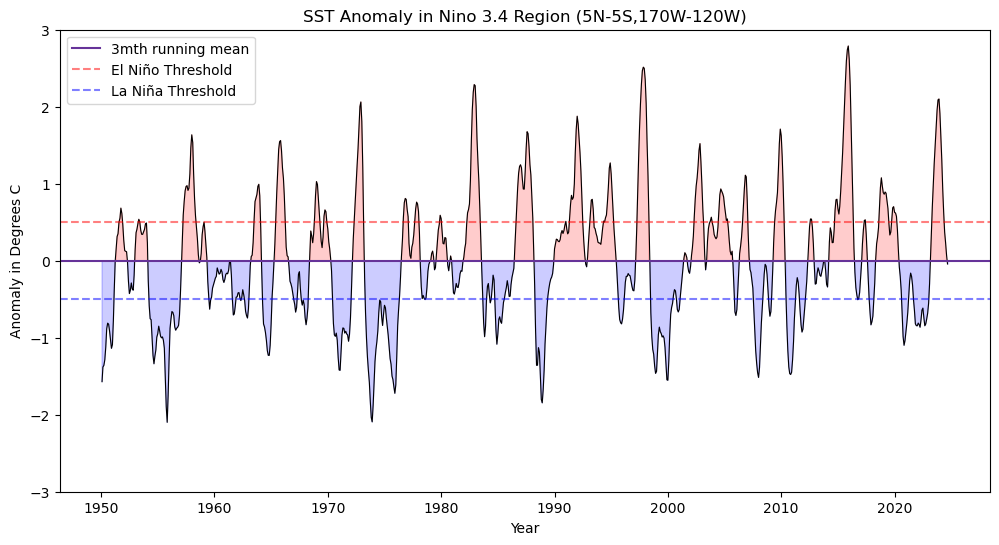

In [194]:
weights = np.cos(np.deg2rad(ds_nino.lat))
weighted_mean = SST_ano.weighted(weights).mean(('lat', 'lon'))

# 3-month running average
nino34 = weighted_mean.rolling(time=3, center=True).mean()

# Plot

plt.plot(nino34.time, nino34, 'k-', linewidth=0.8)
plt.axhline(y=0, color='rebeccapurple', linestyle='-', label='3mth running mean')
plt.fill_between(nino34.time, nino34, 0, where=nino34 >= 0, color='red', alpha=0.2)
plt.fill_between(nino34.time, nino34, 0, where=nino34 <= 0, color='blue', alpha=0.2)

plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.5, label='El Niño Threshold')
plt.axhline(y=-0.5, color='b', linestyle='--', alpha=0.5, label='La Niña Threshold')


plt.title('SST Anomaly in Nino 3.4 Region (5N-5S,170W-120W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.ylim(-3, 3)
plt.legend()
plt.show()

### 2. Calculate boolean timeseries representing the positive / negative ENSO phases

Refer to the definitions of warm/cold phases above.

In [188]:
#Events are defined as 
#5 consecutive overlapping 3-month periods 
#at or above the +0.5o anomaly for warm (El Niño) events
#at or below the -0.5 anomaly for cool (La Niña) events.

warm_boo = nino34 >= 0.5
cold_boo = nino34 <= -0.5

warm_phase = warm_boo.rolling(time=5, center=True).sum() >= 5
cold_phase = cold_boo.rolling(time=5, center=True).sum() >= 5

ENSO = xr.Dataset({
    'warm_phase': warm_phase,
    'cold_phase': cold_phase,
    'neutral_phase': ~(warm_phase | cold_phase)
})

print("\nENSO Phase Statistics:")
print(f"El Niño - Warm phases: {warm_phase.sum().item()} months")
print(f"La Niña - Cold phases: {cold_phase.sum().item()} months")
print(f"Neutral phases: {(~(warm_phase | cold_phase)).sum().item()} months")



ENSO Phase Statistics:
El Niño - Warm phases: 133 months
La Niña - Cold phases: 164 months
Neutral phases: 601 months


Plot them somehow.

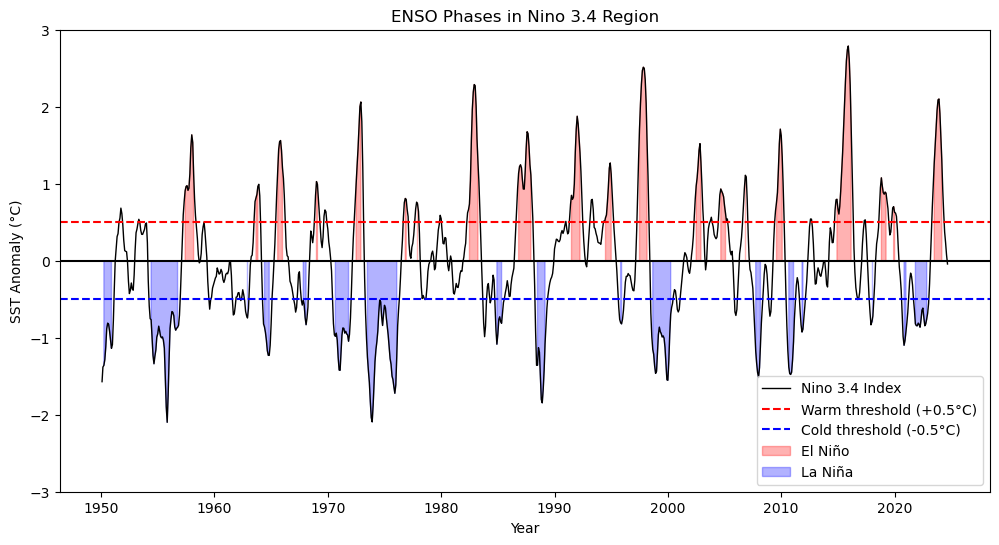

In [229]:
#plot!
plt.plot(nino34.time, nino34, 'black', linewidth=1, label='Nino 3.4 Index')
plt.xlabel('Year')
plt.ylabel('SST Anomaly (°C)')

plt.axhline(y=0.5, color='r', linestyle='--', label='Warm threshold (+0.5°C)')
plt.axhline(y=-0.5, color='b', linestyle='--', label='Cold threshold (-0.5°C)')
plt.axhline(y=0, color='black', linestyle='-')


plt.fill_between(nino34.time, nino34, 0,
                 color='red', alpha=0.3,
                 where=warm_phase,
                 label='El Niño')
plt.fill_between(nino34.time, nino34, 0,
                 where=cold_phase,
                 color='blue', alpha=0.3,
                 label='La Niña')
plt.ylim(-3, 3)

plt.title('ENSO Phases in Nino 3.4 Region')

plt.legend()
plt.show()


### 3. Plot composites of SST anomaly for the positive and negative ENSO regimes

These should be pcolormesh maps. First positive ONI.

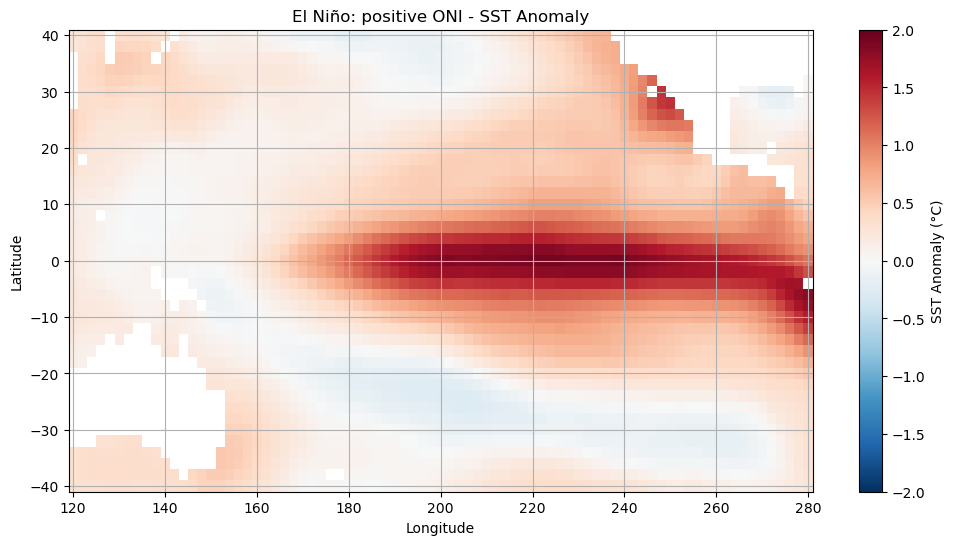

In [199]:
pacific_region = ds.sel(lat=slice(40, -40), lon=slice(120, 280))

climatology_pac = pacific_region.sst.groupby('time.month').mean('time')
pacific_anomaly = pacific_region.sst.groupby('time.month') - climatology_pac

# Composite
positiveONI = pacific_anomaly.where(warm_phase).mean(dim='time')

# Plot
positiveONI.plot.pcolormesh(
    x='lon', 
    y='lat',
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    cbar_kwargs={'label': 'SST Anomaly (°C)'}
)

plt.title('El Niño: positive ONI - SST Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

And negative ONI.

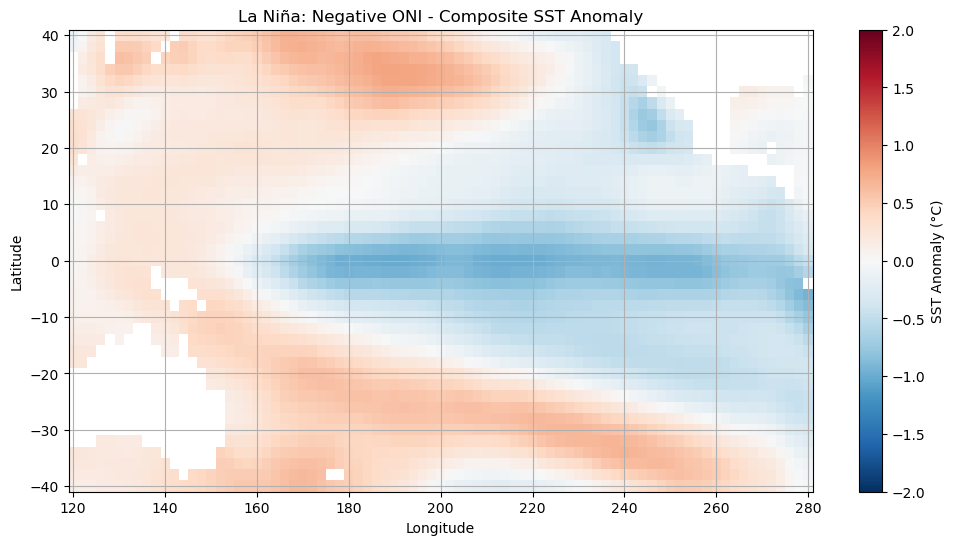

In [200]:
negativeONI = pacific_anomaly.where(cold_phase).mean(dim='time')

# Plot
negativeONI.plot.pcolormesh(
    x='lon', 
    y='lat',
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    cbar_kwargs={'label': 'SST Anomaly (°C)'}
)

plt.title('La Niña: Negative ONI - Composite SST Anomaly')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### 4. Calculate the composite of preciptiation for positive and negative ENSO phases.

First load the precip dataset. Code to fix the broken time coordinate is included.

In [201]:
import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS'))
dsp['T'] = true_time
dsp = dsp.rename({'T': 'time'})
dsp.load()

<xarray.Dataset> Size: 15MB
Dimensions:  (X: 144, time: 361, Y: 72)
Coordinates:
  * X        (X) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 3kB 1960-01-01 1960-02-01 ... 1990-01-01
  * Y        (Y) float32 288B 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
Data variables:
    prcp     (time, Y, X) float32 15MB nan nan nan ... 0.07234 0.06634 0.06526
Attributes:
    Conventions:  IRIDL

Now plot the *difference* between the time-mean of `prcp` during positive and negative ENSO phases.

In [232]:
#define the prcp in the setting region
#X is longitude, degree-east
#Y is latitude, degree_north
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
precip_pacific = dsp.sel(Y=slice(40, -40), X=slice(120, 280))

precip_climatology = precip_pacific.prcp.groupby('time.month').mean('time')
precip_anomaly = precip_pacific.prcp.groupby('time.month') - precip_climatology

positiveONI_precip = precip_anomaly.where(warm_phase).mean(dim='time')
negativeONI_precip = precip_anomaly.where(cold_phase).mean(dim='time')


Text(0.5, 1.0, 'El Niño Precipitation Composite')

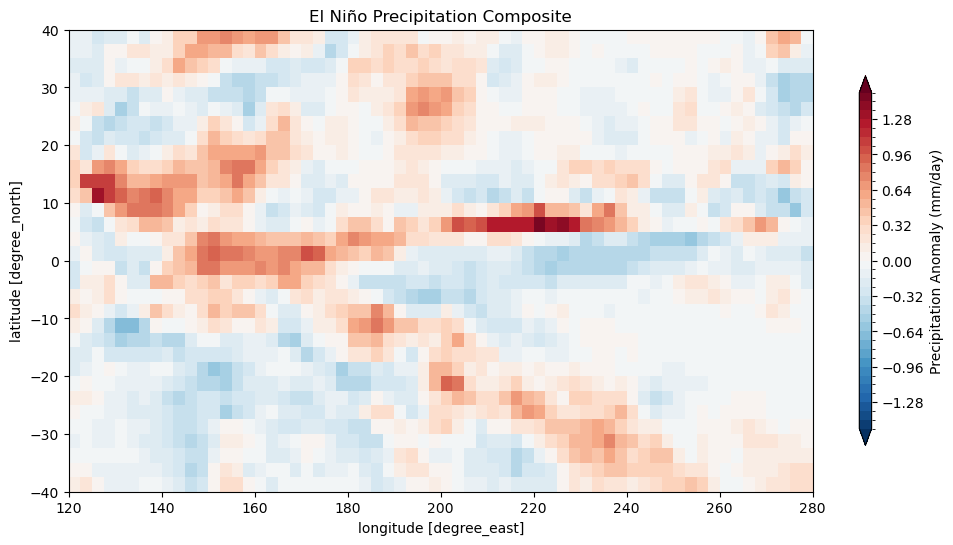

In [252]:
#positive ENSO phases - El nino

plt.figure()
positiveONI_precip.plot.pcolormesh(
    x='X', 
    y='Y',
    cmap='RdBu_r',
    levels=50,
    extend='both',
    cbar_kwargs={
        'label': 'Precipitation Anomaly (mm/day)',
        'extend': 'both',
        'aspect': 30,
        'shrink': 0.8
    }
)
ax.coastlines(color='darkgray', linewidth=1)
plt.title('El Niño Precipitation Composite')


Text(0.5, 1.0, 'La Niña Precipitation Composite')

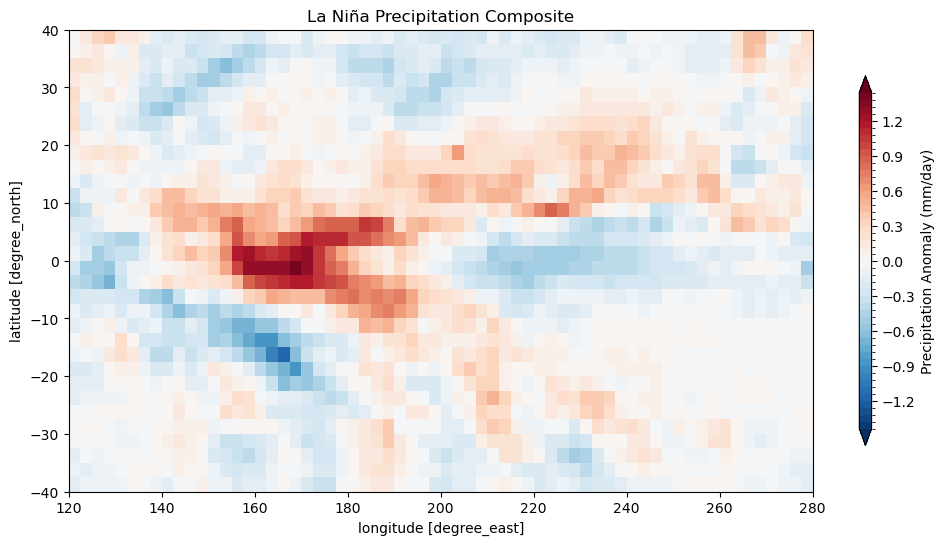

In [253]:
#La Niña composite
plt.figure()
negativeONI_precip.plot.pcolormesh(
    x='X', 
    y='Y',
    cmap='RdBu_r',
    levels=50,
    extend='both',
    cbar_kwargs={
        'label': 'Precipitation Anomaly (mm/day)',
        'extend': 'both',
        'aspect': 30,
        'shrink': 0.8
    }
)

plt.title('La Niña Precipitation Composite')